Check the correlation between words overlap and VGP identification phrase-only model

In [1]:
% cd /home/mayu-ot/durga/Experiments/loc_iparaphrasing/

import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/mnt/fs1/mayu-ot/Experiments/loc_iparaphrasing


In [2]:
df = pd.read_csv('bo_out/none+wea/wo-vis/11-none+wea-wo-vis_20180410-220417/res_test.csv')

In [3]:
df.head()

,Unnamed: 0,image,phrase1,phrase2,score,ypred,ytrue
0,0,1016887272,several+climbers,seven+climbers,9.634218e-01,True,True
1,1,1016887272,several+climbers,rock+face,3.496839e-07,False,False
2,2,1016887272,several+climbers,another+man,4.975832e-02,False,False
3,3,1016887272,several+climbers,rope,6.396159e-06,False,False
4,4,1016887272,rock,seven+climbers,1.284027e-06,False,False


In [4]:
def lang_iou(x, y):
    x = set(x.split('+'))
    y = set(y.split('+'))
    inter = x.intersection(y)
    union = x.union(y)
    iou = len(inter) / len(union)
    return iou

p_ious = []
for _, row in df.iterrows():
    p_iou = lang_iou(row.phrase1, row.phrase2)
    p_ious.append(p_iou)

df['p_ious'] = np.asarray(p_ious)

(array([5165.,   55.,  767., 1649.,   31., 2631.,  451.,   40.,    0.,
          11.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

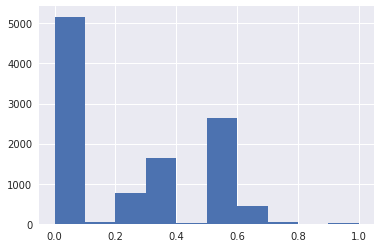

In [5]:
plt.hist(df[df.ytrue].p_ious)

(array([6.8519e+04, 8.1000e+01, 5.2000e+02, 7.0800e+02, 1.8000e+01,
        5.7100e+02, 4.8000e+01, 9.0000e+00, 2.0000e+00, 9.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

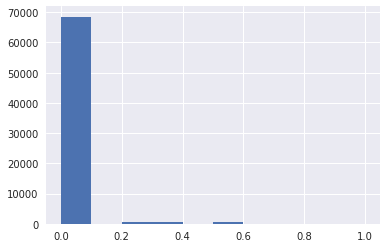

In [6]:
plt.hist(df[df.ytrue == False].p_ious)

In [7]:
no_overlap_df = df[df.p_ious > 0]
sum(no_overlap_df.ytrue) / len(no_overlap_df)

0.7413498223917906

In [8]:
interval = 0.1
plt.axhline(lng_avr_score, color='k', linestyle='--', label='phrase-only')
plt.plot(np.arange(interval, 1+interval, interval), vis_scores, label='visual-only')
plt.plot(np.arange(interval, 1+interval, interval), vis_lng_scores, label='ours')
plt.xlabel('IoU')
plt.ylabel('F1 score')
plt.legend()
plt.savefig('iou_curve.pdf', bbox_inches='tight')

NameError: name 'lng_avr_score' is not defined

In [134]:
np.arange(interval, 1+interval, interval)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [4]:
vis_df = pd.DataFrame({'IoU': np.arange(interval, 1+interval, interval),
                      'Avr. F1 score': vis_scores,
                      'models': ['visual-only (PL-CLC)']*len(vis_score)})
vis_lng_df = pd.DataFrame({'IoU': np.arange(interval, 1+interval, interval),
                      'Avr. F1 score': vis_lng_scores,
                      'models': ['ours']*len(vis_score)})
plt.axhline(lng_avr_score, color='k', linestyle='--', label='phrase-only')
g = sns.barplot(x='IoU', y='Avr. F1 score', hue='models', data=pd.concat((vis_df, vis_lng_df)))
g.set_xticklabels(['%.1f'%x for x in np.arange(interval, 1+interval, interval)])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('detailed_results_bar.pdf', bbox_inches='tight')

NameError: name 'interval' is not defined